# Courbes d’intensités

Courbes d’intensités lumineuse au limbe à partir d'images d’un coronographe

In [1]:
import bz2
from pathlib import Path

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

import math

In [2]:
path = 'data/C1/imoa_06563_c1_20240313_09472619_bri1.fts.bz2'

decompressed_file = bz2.BZ2File(path)

with fits.open(decompressed_file) as hdul:
    data = hdul[0].data

In [3]:
circles = []
stepSize = 1*math.pi/360
for r in [800, 810, 820]:
    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((round(r * math.cos(t) + data.shape[0]/2,), round(r * math.sin(t) + data.shape[0]/2)))
        t += stepSize
    circles.append(positions)

In [8]:
coord_x = []
coord_y = []
for idx in range(3):
    coord_x.append([x for x,y in circles[idx]])
    coord_y.append([y for x,y in circles[idx]])

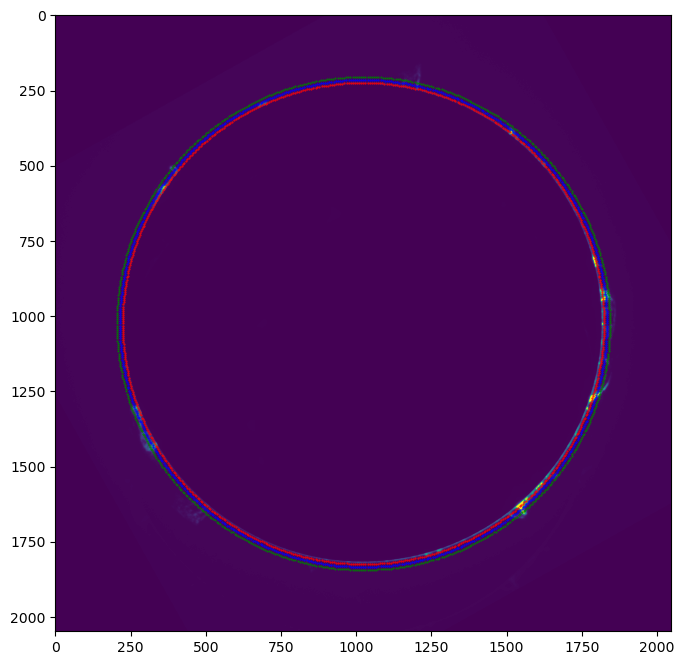

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(data)
plt.scatter(coord_x[0], coord_y[0], marker='.', s=1, c='r');
plt.scatter(coord_x[1], coord_y[1], marker='.', s=1, c='g');
plt.scatter(coord_x[2], coord_y[2], marker='.', s=1, c='b');
 

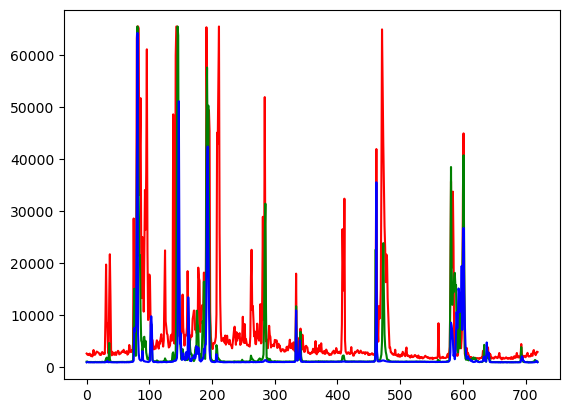

In [6]:
curves = []
for circle in circles:
    intensity = []
    for coord in circle:
        intensity.append(data[coord])
    curves.append(intensity)

plt.figure
plt.plot(curves[0],'r');
plt.plot(curves[1],'g');
plt.plot(curves[2],'b');
